In [6]:
from ultralytics import YOLO
import cv2
from IPython.display import Image, display
import numpy as np

In [32]:
model = YOLO("models\yolov8x-pose.pt")

In [36]:
source = "https://gumlet.assettype.com/freepressjournal/2023-03/bc88d9b2-6c29-4454-8ac5-dc1f838f3bfd/Untitled_design___2023_03_05T123103_385.png"
res = model.track(source)


Found https://gumlet.assettype.com/freepressjournal/2023-03/bc88d9b2-6c29-4454-8ac5-dc1f838f3bfd/Untitled_design___2023_03_05T123103_385.png locally at Untitled_design___2023_03_05T123103_385.png
image 1/1 d:\Python\sinar-backend\Untitled_design___2023_03_05T123103_385.png: 384x640 6 persons, 1034.1ms
Speed: 2.0ms preprocess, 1034.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [21]:
np.save("tes.npy", res[0].keypoints.data.numpy())

In [ ]:
img = res[0].plot()
_, jpg = cv2.imencode(".jpg", img)
display(Image(jpg))

In [20]:
res[0].keypoints.conf

tensor([[0.9383, 0.9481, 0.7108, 0.9182, 0.2847, 0.9959, 0.9431, 0.9863, 0.6701, 0.9574, 0.6183, 0.9957, 0.9835, 0.9887, 0.9615, 0.9582, 0.9127],
        [0.0578, 0.0654, 0.0184, 0.2028, 0.0267, 0.4493, 0.1932, 0.5015, 0.1173, 0.4050, 0.1301, 0.6372, 0.4841, 0.5565, 0.3984, 0.3876, 0.2859],
        [0.9701, 0.8960, 0.9647, 0.5858, 0.8885, 0.9732, 0.9944, 0.7917, 0.9713, 0.6658, 0.9161, 0.9878, 0.9945, 0.9760, 0.9897, 0.9491, 0.9707],
        [0.9273, 0.9423, 0.7880, 0.8594, 0.2749, 0.9750, 0.9373, 0.8971, 0.5545, 0.8265, 0.5046, 0.9586, 0.9314, 0.9110, 0.8371, 0.8205, 0.7337],
        [0.9376, 0.9340, 0.8519, 0.8223, 0.4496, 0.9890, 0.9783, 0.9453, 0.7902, 0.8976, 0.7190, 0.9901, 0.9851, 0.9740, 0.9538, 0.9320, 0.8972],
        [0.6194, 0.4504, 0.5025, 0.2650, 0.3372, 0.9108, 0.9433, 0.8116, 0.8929, 0.7835, 0.8529, 0.9813, 0.9855, 0.9790, 0.9821, 0.9638, 0.9678],
        [0.0381, 0.0277, 0.0256, 0.0538, 0.0561, 0.1205, 0.1934, 0.1490, 0.2696, 0.1687, 0.2559, 0.1367, 0.1854, 0.0958, 0.1

In [21]:
np.all(res[0].keypoints.data[:, :, -1].numpy() == res[0].keypoints.conf.numpy())

True

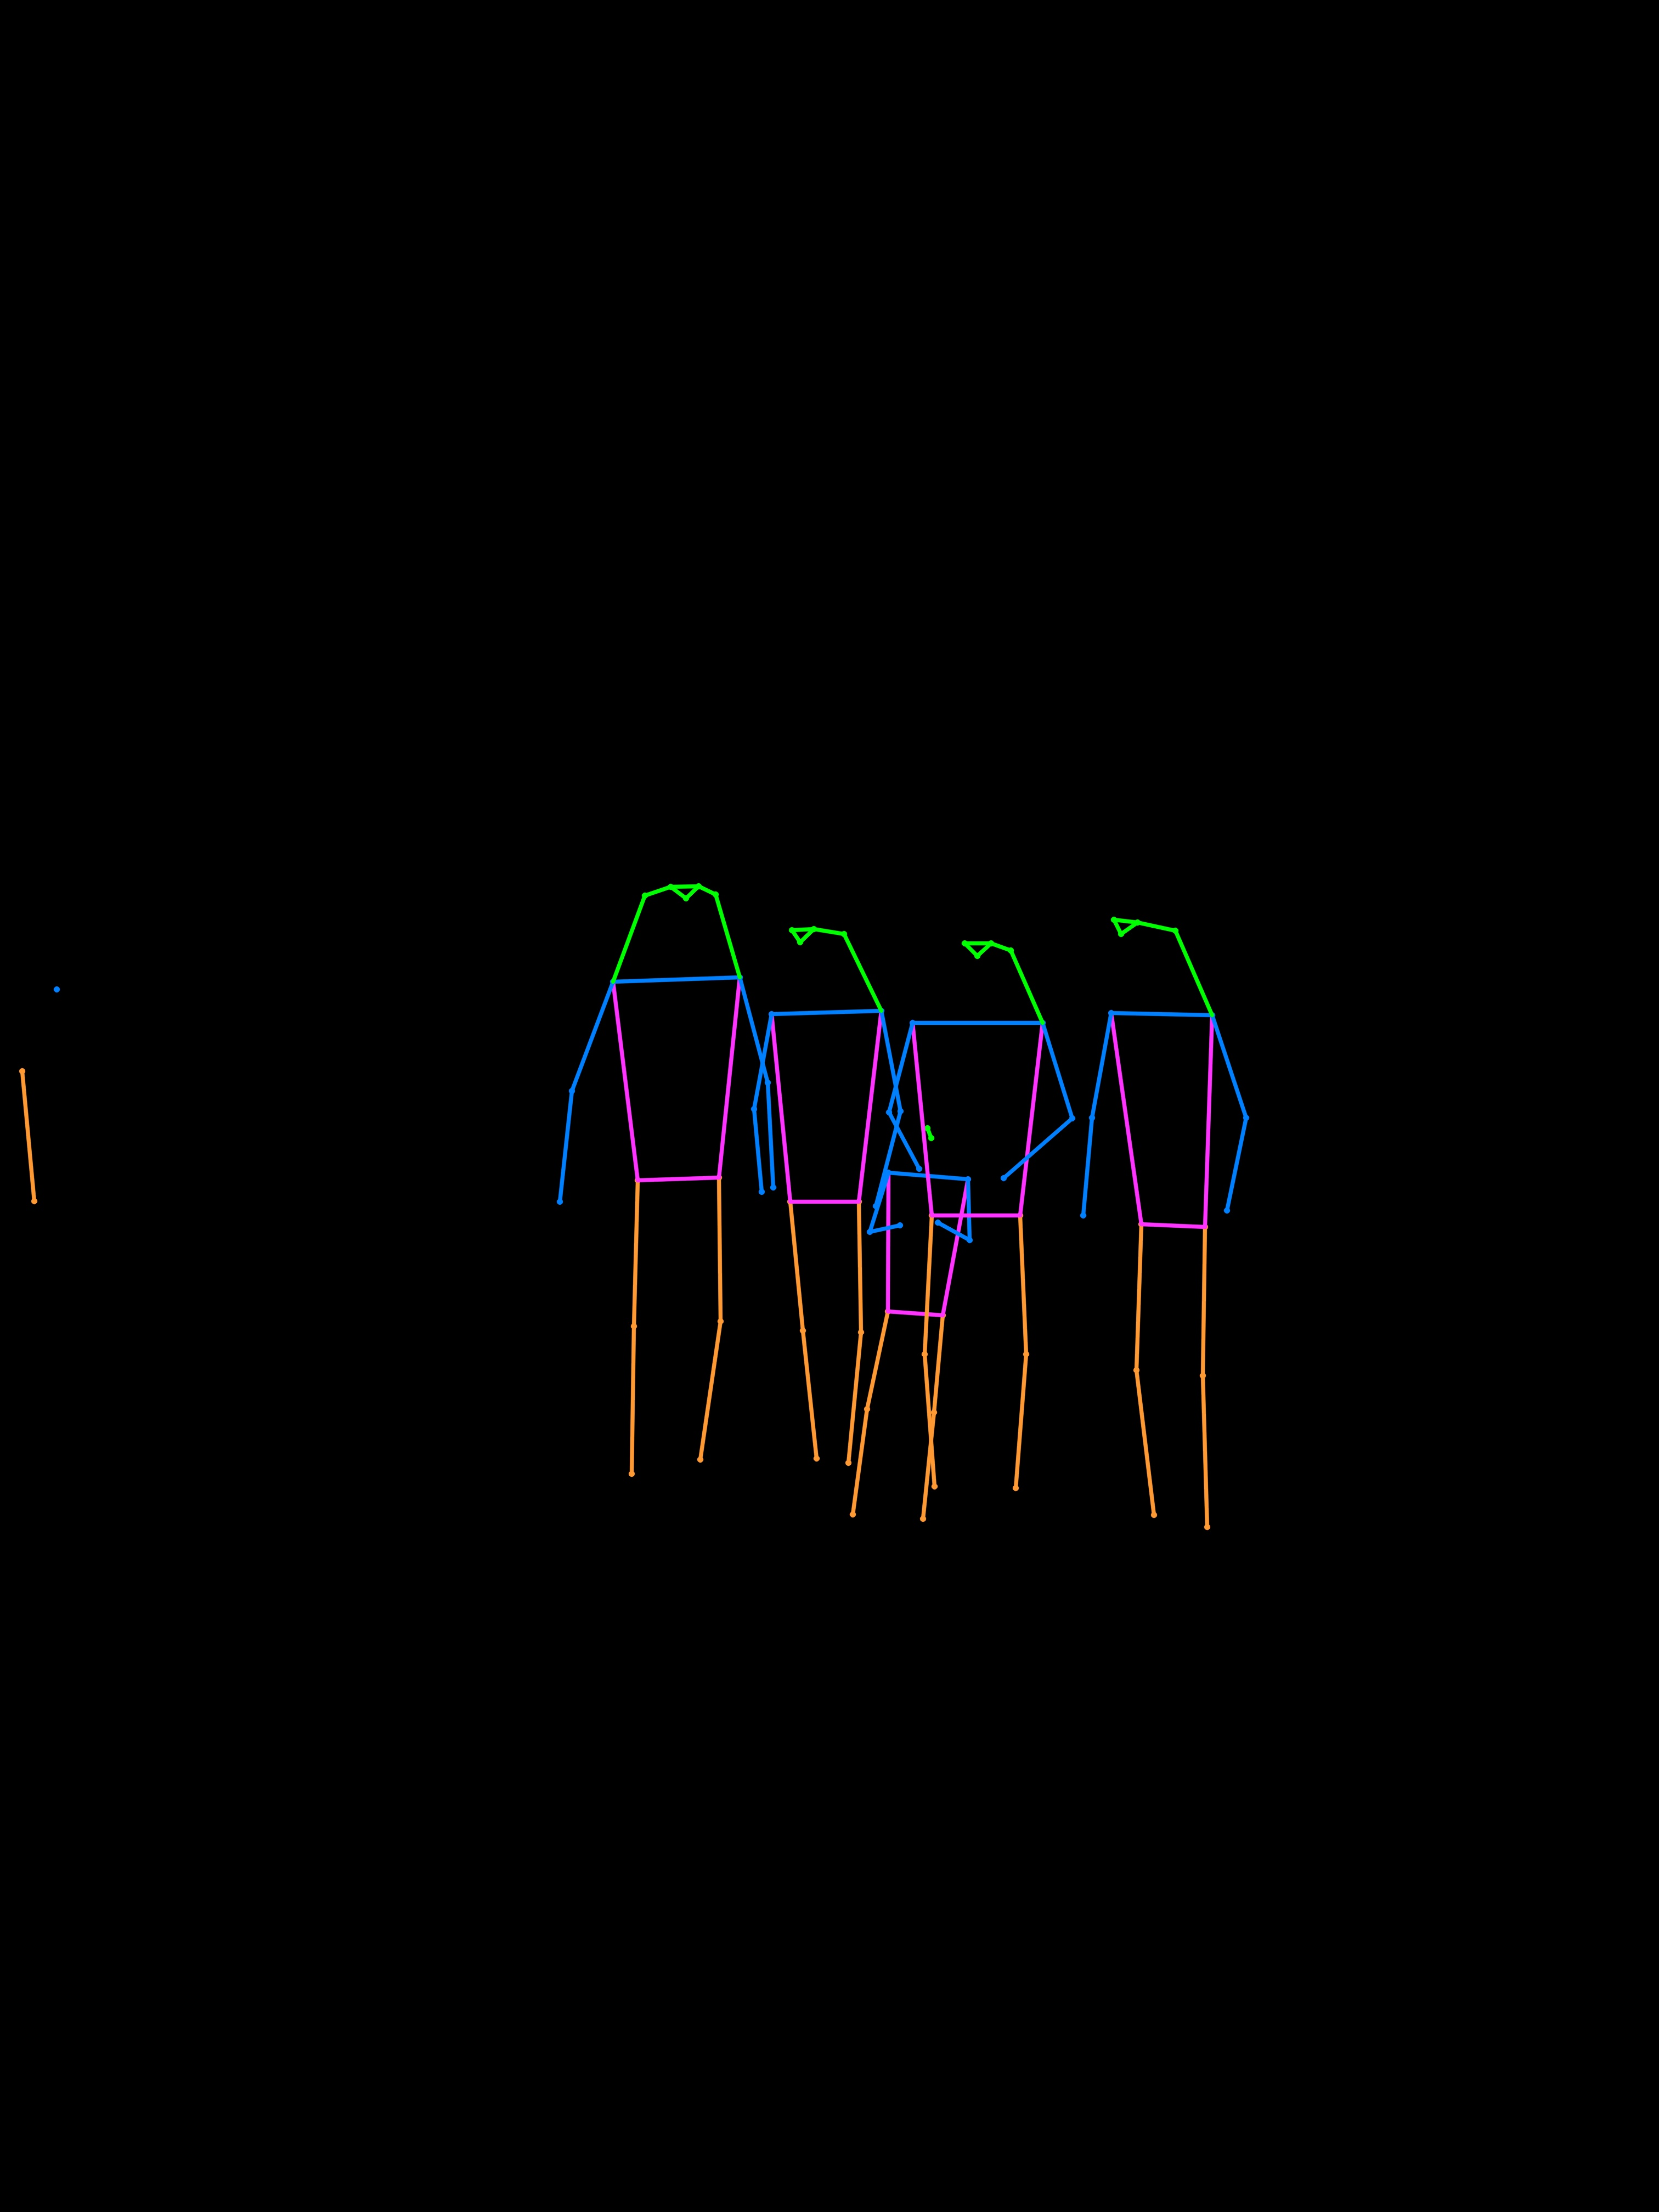

In [23]:
blank = np.zeros_like(img)
img = res[0].plot(img=blank, boxes=False)
_, jpg = cv2.imencode(".jpg", img)
display(Image(jpg))